In [338]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')

In [339]:
df = pd.read_csv("Data for problem 2.csv")

In [340]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### EXPLORATORY DATA ANALYSIS

In [341]:
df.shape

(8950, 18)

In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [343]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


#### CHECKING MISSING VALUES

In [344]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

#### FILLING MISSING VALUES WITH RESPECTIVE MEANS

In [345]:
df.fillna(df.mean(),inplace=True)

In [346]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [347]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [348]:
df.duplicated().sum()

0

In [349]:
df = df.drop(["CUST_ID"],axis=1)

In [350]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


#### BALANCE DISTRIBUTION

C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BALANCE'>

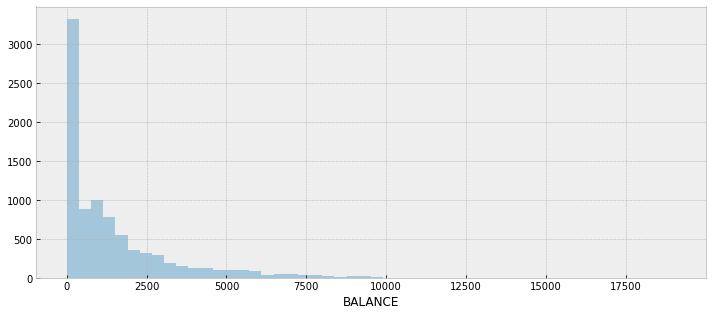

In [351]:
plt.figure(figsize=(12,5))
sns.distplot(df["BALANCE"],bins=50,kde=False,label="BALANCE")


In [352]:
df[df["BALANCE"] <100 ]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.0,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.00,12
17,41.089489,0.454545,519.00,0.0,519.00,0.000000,0.416667,0.000000,0.333333,0.000000,0,8,2500.0,254.590662,73.203221,0.25,12
29,22.063490,1.000000,100.00,0.0,100.00,0.000000,0.416667,0.000000,0.416667,0.000000,0,5,6900.0,160.767773,159.684442,0.00,12
54,6.660517,0.636364,310.00,0.0,310.00,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,864.206542,0.00,12
63,7.152356,0.090909,840.00,840.0,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1600.0,0.000000,864.206542,0.00,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.9,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.00,6
8945,28.493517,1.000000,291.12,0.0,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,19.183215,1.000000,300.00,0.0,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.00,6
8947,23.398673,0.833333,144.40,0.0,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6


#### PURCHASE DISTRIBUTION

C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PURCHASES'>

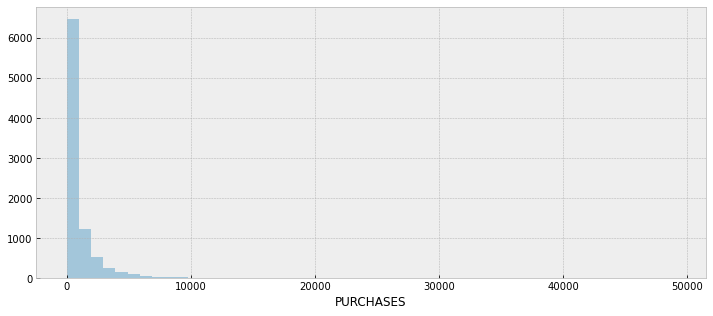

In [353]:
plt.figure(figsize=(12,5))
sns.distplot(df["PURCHASES"],bins=50,kde=False)

#### TENURE DISTRIBUTION

<AxesSubplot:xlabel='TENURE'>

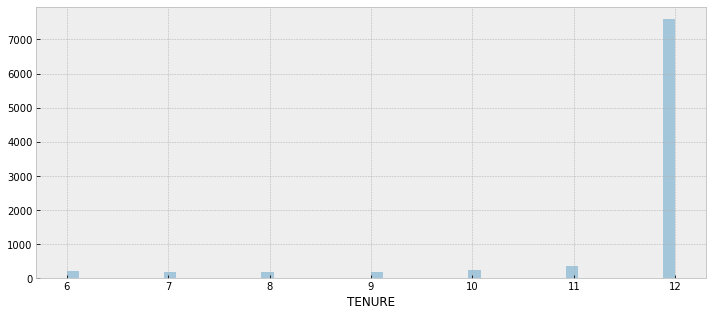

In [354]:
plt.figure(figsize=(12,5))
sns.distplot(df["TENURE"],bins=50,kde=False)

### KPI

**Monthly average purchase**

In [355]:
df["MONTHLY_AVG_PURCHASE"] = df["PURCHASES"]/df["TENURE"]

In [356]:
df["MONTHLY_AVG_PURCHASE"]

0         7.950000
1         0.000000
2        64.430833
3       124.916667
4         1.333333
           ...    
8945     48.520000
8946     50.000000
8947     24.066667
8948      0.000000
8949    182.208333
Name: MONTHLY_AVG_PURCHASE, Length: 8950, dtype: float64

**Monthly Cash advance amount**

In [357]:
df["CASH_ADV_AMT"] = df["CASH_ADVANCE"]/df["TENURE"]

In [358]:
df["CASH_ADV_AMT"]

0         0.000000
1       536.912124
2         0.000000
3        17.149001
4         0.000000
           ...    
8945      0.000000
8946      0.000000
8947      0.000000
8948      6.093130
8949     21.173335
Name: CASH_ADV_AMT, Length: 8950, dtype: float64

**PURCHASE BY TYPE**

In [359]:
df[["ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES"]]

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.40
1,0.00,0.00
2,773.17,0.00
3,1499.00,0.00
4,16.00,0.00
...,...,...
8945,0.00,291.12
8946,0.00,300.00
8947,0.00,144.40
8948,0.00,0.00


In [360]:
def purchase_type(df):
    if (df["ONEOFF_PURCHASES"] == 0) & (df["INSTALLMENTS_PURCHASES"] == 0):
        return "None"
    if (df["ONEOFF_PURCHASES"] == 0) & (df["INSTALLMENTS_PURCHASES"] > 0):
        return "INST"
    if (df["ONEOFF_PURCHASES"] > 0) & (df["INSTALLMENTS_PURCHASES"] == 0):
        return "ONE_OFF"
    if (df["ONEOFF_PURCHASES"] > 0) & (df["INSTALLMENTS_PURCHASES"] > 0):
        return "ONEOFF_&_INST"

In [361]:
df["PURCHASE_TYPE"] = df.apply(purchase_type,axis=1)

In [362]:
df["PURCHASE_TYPE"].value_counts()

ONEOFF_&_INST    2774
INST             2260
None             2042
ONE_OFF          1874
Name: PURCHASE_TYPE, dtype: int64

In [363]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'MONTHLY_AVG_PURCHASE', 'CASH_ADV_AMT', 'PURCHASE_TYPE'],
      dtype='object')

In [364]:
# Average amount per purchase transaction & Average amount per cash-advance transaction : already given


**Limit usage (balance to credit limit ratio)**

In [365]:
df["LIMIT_USAGE"] = df["BALANCE"]/df["CREDIT_LIMIT"]
df["LIMIT_USAGE"]

0       0.040901
1       0.457495
2       0.332687
3       0.222223
4       0.681429
          ...   
8945    0.028494
8946    0.019183
8947    0.023399
8948    0.026915
8949    0.310590
Name: LIMIT_USAGE, Length: 8950, dtype: float64

**Payments to minimum payments ratio**

In [366]:
df["PAYMENT_TO_MIN_PAY_RATIO"] = df["PAYMENTS"]/df["MINIMUM_PAYMENTS"]
df["PAYMENT_TO_MIN_PAY_RATIO"]

0       1.446508
1       3.826241
2       0.991682
3       0.000000
4       2.771075
          ...   
8945    6.660231
8946    0.319208
8947    0.986076
8948    0.942505
8949    0.715439
Name: PAYMENT_TO_MIN_PAY_RATIO, Length: 8950, dtype: float64

### INSIGHTS DERIVED FROM THE KPIs

#### MONTHLY AVG PURCHARSES BY PURCHASE TYPE

<AxesSubplot:xlabel='PURCHASE_TYPE'>

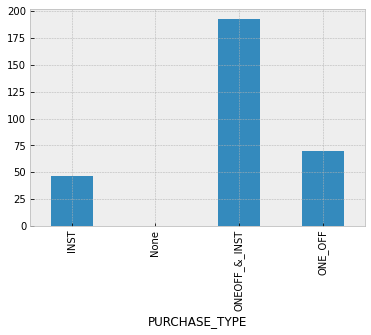

In [367]:
df.groupby("PURCHASE_TYPE")["MONTHLY_AVG_PURCHASE"].mean().plot(kind="bar")

#### LIMIT USAGE BY PURCHASE TYPE

<AxesSubplot:xlabel='PURCHASE_TYPE'>

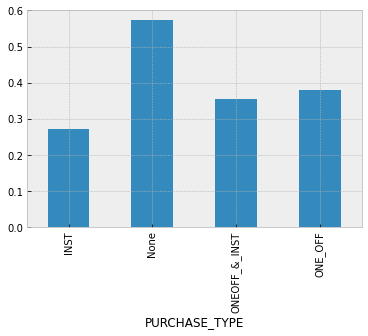

In [368]:
df.groupby("PURCHASE_TYPE")["LIMIT_USAGE"].mean().plot(kind="bar")

#### PAYMENT TO MIN PAYMENT RATIO BY PURCHASE TYPE

<AxesSubplot:xlabel='PURCHASE_TYPE'>

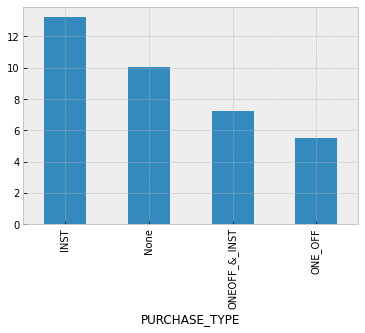

In [369]:
df.groupby("PURCHASE_TYPE")["PAYMENT_TO_MIN_PAY_RATIO"].mean().plot(kind="bar")

#### CASH ADVANCE BY PURCHASE TYPE

<AxesSubplot:xlabel='PURCHASE_TYPE'>

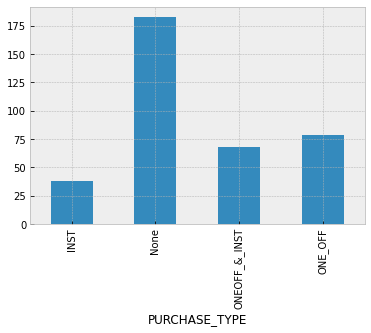

In [370]:
df.groupby("PURCHASE_TYPE")["CASH_ADV_AMT"].mean().plot(kind="bar")

In [371]:
df_copy = df.copy()

In [372]:
df_copy

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MONTHLY_AVG_PURCHASE,CASH_ADV_AMT,PURCHASE_TYPE,LIMIT_USAGE,PAYMENT_TO_MIN_PAY_RATIO
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,...,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,INST,0.040901,1.446508
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,...,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,None,0.457495,3.826241
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,...,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,ONE_OFF,0.332687,0.991682
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,...,7500.0,0.000000,864.206542,0.000000,12,124.916667,17.149001,ONE_OFF,0.222223,0.000000
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,...,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,ONE_OFF,0.681429,2.771075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,...,1000.0,325.594462,48.886365,0.500000,6,48.520000,0.000000,INST,0.028494,6.660231
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,...,1000.0,275.861322,864.206542,0.000000,6,50.000000,0.000000,INST,0.019183,0.319208
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,...,1000.0,81.270775,82.418369,0.250000,6,24.066667,0.000000,INST,0.023399,0.986076
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,...,500.0,52.549959,55.755628,0.250000,6,0.000000,6.093130,None,0.026915,0.942505


### Converting categorical features.

In [373]:
dummies = pd.get_dummies(df["PURCHASE_TYPE"])
dummies

,INST,None,ONEOFF_&_INST,ONE_OFF
0,1,0,0,0
1,0,1,0,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
8945,1,0,0,0
8946,1,0,0,0
8947,1,0,0,0
8948,0,1,0,0


In [374]:
df = pd.concat([df.drop("PURCHASE_TYPE",axis=1),dummies],axis=1)

In [375]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PRC_FULL_PAYMENT,TENURE,MONTHLY_AVG_PURCHASE,CASH_ADV_AMT,LIMIT_USAGE,PAYMENT_TO_MIN_PAY_RATIO,INST,None,ONEOFF_&_INST,ONE_OFF
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,0.000000,12,7.950000,0.000000,0.040901,1.446508,1,0,0,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,0.222222,12,0.000000,536.912124,0.457495,3.826241,0,1,0,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,12,64.430833,0.000000,0.332687,0.991682,0,0,0,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,0.000000,12,124.916667,17.149001,0.222223,0.000000,0,0,0,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,0.000000,12,1.333333,0.000000,0.681429,2.771075,0,0,0,1


In [376]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [377]:
scaled_df

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.54369045,
        -0.67019253, -0.514625  ],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  1.83928189,
        -0.67019253, -0.514625  ],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.54369045,
        -0.67019253,  1.94316249],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.54369045,
        -0.67019253, -0.514625  ],
       [-0.74517423, -0.18547673, -0.46955188, ...,  1.83928189,
        -0.67019253, -0.514625  ],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.54369045,
        -0.67019253,  1.94316249]])

In [378]:
from sklearn.cluster import KMeans

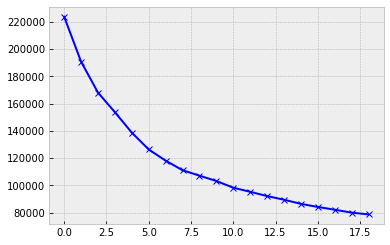

In [379]:
scores = []

for i in range(1,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_df)
    scores.append(kmeans.inertia_)
    
plt.plot(scores,'bx-')    

In [380]:
kmeans = KMeans(5)
kmeans.fit(scaled_df)

KMeans(n_clusters=5)

In [381]:
label = kmeans.labels_
label

array([1, 0, 3, ..., 1, 2, 2])

In [382]:
kmeans.cluster_centers_.shape

(5, 25)

In [383]:
clustered_df = pd.DataFrame(data=kmeans.cluster_centers_,columns=[df.columns])

In [384]:
clustered_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PRC_FULL_PAYMENT,TENURE,MONTHLY_AVG_PURCHASE,CASH_ADV_AMT,LIMIT_USAGE,PAYMENT_TO_MIN_PAY_RATIO,INST,None,ONEOFF_&_INST,ONE_OFF
0,1.581893,0.345884,-0.238715,-0.168825,-0.254377,2.124490,-0.553078,-0.236068,-0.485894,1.869368,...,-0.380111,-0.180369,-0.230299,2.109161,0.633535,-0.027960,-0.352571,0.621494,-0.192863,-0.045312
1,-0.465924,-0.268294,-0.232703,-0.356934,0.106118,-0.376117,0.535077,-0.678661,0.766663,-0.511336,...,0.380580,-0.037733,-0.231455,-0.369919,-0.359596,0.040031,1.720516,-0.543690,-0.670193,-0.514625
2,-0.134554,-0.181424,-0.350014,-0.204744,-0.451446,-0.098064,-0.928479,-0.297720,-0.905652,0.110969,...,-0.346851,-0.100103,-0.348918,-0.093736,0.215811,-0.010564,-0.566708,0.657562,-0.617021,0.628262
3,-0.102578,0.295224,0.362955,0.302156,0.302760,-0.310056,0.821537,0.887271,0.579617,-0.352203,...,0.201248,0.197110,0.360430,-0.314397,-0.194637,-0.016046,-0.578502,-0.543690,1.311633,-0.312390
4,1.308517,0.449927,4.701039,4.160239,3.470573,-0.110901,1.116950,1.858913,1.041991,-0.295784,...,0.619698,0.317869,4.662709,-0.121750,0.028029,0.072561,-0.497303,-0.543690,1.221821,-0.297008


In [385]:
clustered_df = scaler.inverse_transform(clustered_df)
clustered_df = pd.DataFrame(data = clustered_df,columns=[df.columns])
clustered_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PRC_FULL_PAYMENT,TENURE,MONTHLY_AVG_PURCHASE,CASH_ADV_AMT,LIMIT_USAGE,PAYMENT_TO_MIN_PAY_RATIO,INST,None,ONEOFF_&_INST,ONE_OFF
0,4857.051637,0.959208,493.186810,3.122227e+02,181.037991,5434.026304,0.268374,1.320339e-01,0.171331,0.509224,...,0.042539,11.275938,44.606592,496.310396,0.635772,5.732099,0.099338,4.889625e-01,2.207506e-01,1.909492e-01
1,594.693011,0.813714,506.031196,7.617018e-12,507.028794,190.135183,0.705103,1.665335e-15,0.669129,0.032821,...,0.265028,11.466822,44.397921,17.537291,0.248749,13.766628,1.000000,5.551115e-16,-1.498801e-15,-2.081668e-15
2,1284.413000,0.834293,255.394026,2.526043e+02,2.830268,773.225294,0.117707,1.136421e-01,0.004508,0.157350,...,0.052267,11.383354,23.195860,70.875275,0.472985,7.787751,0.006305,5.040984e-01,2.459016e-02,4.650063e-01
3,1350.966748,0.947207,1778.663984,1.093954e+03,684.849862,328.668461,0.820073,4.671477e-01,0.594792,0.064665,...,0.212576,11.781102,151.232323,28.259961,0.313033,7.139932,0.001181,1.443290e-15,9.165354e-01,8.228346e-02
4,4288.043258,0.983854,11047.046250,7.497582e+03,3549.464167,746.306313,0.938636,7.570076e-01,0.778551,0.075955,...,0.334966,11.942708,927.788050,65.464896,0.399806,17.610636,0.036458,0.000000e+00,8.750000e-01,8.854167e-02


In [386]:
credit_clustered_df = pd.concat([df,pd.DataFrame({'Cluster': label})],axis=1)

In [387]:
credit_clustered_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,TENURE,MONTHLY_AVG_PURCHASE,CASH_ADV_AMT,LIMIT_USAGE,PAYMENT_TO_MIN_PAY_RATIO,INST,None,ONEOFF_&_INST,ONE_OFF,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,...,12,7.950000,0.000000,0.040901,1.446508,1,0,0,0,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,...,12,0.000000,536.912124,0.457495,3.826241,0,1,0,0,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,...,12,64.430833,0.000000,0.332687,0.991682,0,0,0,1,3
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,...,12,124.916667,17.149001,0.222223,0.000000,0,0,0,1,2
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,...,12,1.333333,0.000000,0.681429,2.771075,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,...,6,48.520000,0.000000,0.028494,6.660231,1,0,0,0,1
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,...,6,50.000000,0.000000,0.019183,0.319208,1,0,0,0,1
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,...,6,24.066667,0.000000,0.023399,0.986076,1,0,0,0,1
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,...,6,0.000000,6.093130,0.026915,0.942505,0,1,0,0,2


In [388]:
df_copy["Cluster"] = credit_clustered_df["Cluster"]

In [389]:
df_copy.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MONTHLY_AVG_PURCHASE,CASH_ADV_AMT,PURCHASE_TYPE,LIMIT_USAGE,PAYMENT_TO_MIN_PAY_RATIO,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,201.802084,139.509787,0.000000,12,7.950000,0.000000,INST,0.040901,1.446508,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,None,0.457495,3.826241,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,622.066742,627.284787,0.000000,12,64.430833,0.000000,ONE_OFF,0.332687,0.991682,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,0.000000,864.206542,0.000000,12,124.916667,17.149001,ONE_OFF,0.222223,0.000000,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,678.334763,244.791237,0.000000,12,1.333333,0.000000,ONE_OFF,0.681429,2.771075,2


In [390]:
df_copy["Cluster_gp"] = df_copy["Cluster"].map({0:'Cluster 0',1:'Cluster 1',2:'Cluster 2',3:'Cluster 3',4:'Cluster 4'})

In [391]:
df_copy.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MONTHLY_AVG_PURCHASE,CASH_ADV_AMT,PURCHASE_TYPE,LIMIT_USAGE,PAYMENT_TO_MIN_PAY_RATIO,Cluster,Cluster_gp
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,139.509787,0.000000,12,7.950000,0.000000,INST,0.040901,1.446508,1,Cluster 1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,1072.340217,0.222222,12,0.000000,536.912124,None,0.457495,3.826241,0,Cluster 0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,627.284787,0.000000,12,64.430833,0.000000,ONE_OFF,0.332687,0.991682,3,Cluster 3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,864.206542,0.000000,12,124.916667,17.149001,ONE_OFF,0.222223,0.000000,2,Cluster 2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,244.791237,0.000000,12,1.333333,0.000000,ONE_OFF,0.681429,2.771075,2,Cluster 2


In [394]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(scaled_df)
principal_comp

array([[-1.40481541, -2.00579984],
       [-2.17656534,  3.20780344],
       [ 0.72029536, -0.3605314 ],
       ...,
       [-0.62033907, -2.48464494],
       [-2.49565515, -0.81619458],
       [-0.31531137, -0.413314  ]])

In [395]:
pca_df = pd.DataFrame(data=principal_comp,columns=['pca1','pca2'])

In [396]:
pca_df

,pca1,pca2
0,-1.404815,-2.005800
1,-2.176565,3.207803
2,0.720295,-0.360531
3,-0.771010,-0.297688
4,-1.658157,-0.832091
...,...,...
8945,-0.076828,-2.561720
8946,-0.280362,-2.275284
8947,-0.620339,-2.484645
8948,-2.495655,-0.816195


In [397]:
pca_df = pd.concat([pca_df,pd.DataFrame({'Cluster':label})],axis=1)

In [398]:
pca_df

,pca1,pca2,Cluster
0,-1.404815,-2.005800,1
1,-2.176565,3.207803,0
2,0.720295,-0.360531,3
3,-0.771010,-0.297688,2
4,-1.658157,-0.832091,2
...,...,...,...
8945,-0.076828,-2.561720,1
8946,-0.280362,-2.275284,1
8947,-0.620339,-2.484645,1
8948,-2.495655,-0.816195,2


<AxesSubplot:xlabel='pca1', ylabel='pca2'>

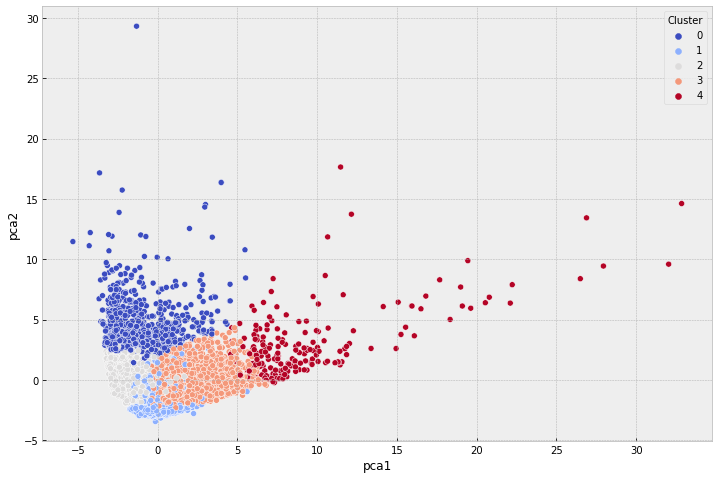

In [399]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='pca1',y='pca2',hue='Cluster',data=pca_df,palette='coolwarm')

In [400]:
(100/len(credit_clustered_df))*credit_clustered_df["Cluster"].value_counts()

2    35.463687
3    28.357542
1    23.910615
0    10.122905
4     2.145251
Name: Cluster, dtype: float64

In [401]:
credit_clustered_df.groupby("Cluster")["LIMIT_USAGE"].mean()

Cluster
0    0.635772
1    0.248749
2    0.472701
3    0.313263
4    0.399806
Name: LIMIT_USAGE, dtype: float64

In [402]:
credit_clustered_df.groupby("Cluster")["CASH_ADV_AMT"].mean()

Cluster
0    496.310396
1     17.537291
2     70.830615
3     28.282230
4     65.464896
Name: CASH_ADV_AMT, dtype: float64

In [403]:
credit_clustered_df.groupby("Cluster")["PAYMENT_TO_MIN_PAY_RATIO"].mean()

Cluster
0     5.732099
1    13.766628
2     7.784568
3     7.143402
4    17.610636
Name: PAYMENT_TO_MIN_PAY_RATIO, dtype: float64

<AxesSubplot:xlabel='Cluster'>

<Figure size 864x576 with 0 Axes>

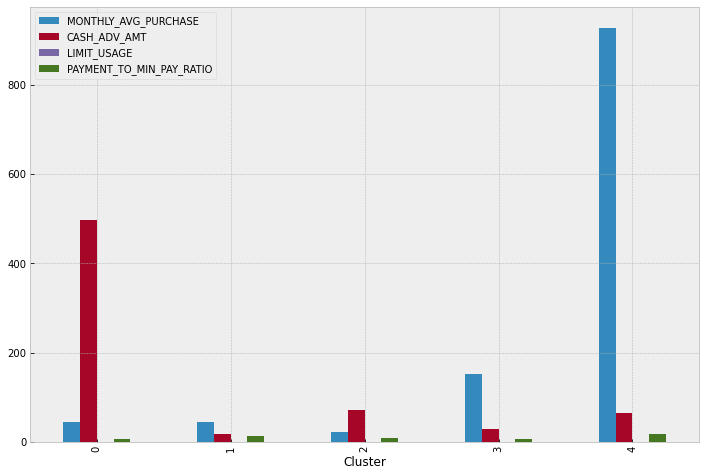

In [404]:
plt.figure(figsize=(12,8))
credit_clustered_df.groupby("Cluster")[["MONTHLY_AVG_PURCHASE","CASH_ADV_AMT","LIMIT_USAGE","PAYMENT_TO_MIN_PAY_RATIO"]].mean().plot(kind="bar",figsize=(12,8))

 ####  CLUSTER 2 :
             It constitute the 35.46% (highest) of customer base.
             This group customers are lowest spender with lowest MONTHLY_AVG_PURCHASE and has comparatively high monthly  
             CASH_ADV_AMT.
             Since this group covers the highest % of customer base, they could be provided discount on the first few 
             purchases so that they could use their credit card more often.
####  CLUSTER 3 :
               It constitute the 28.35% of customer base.
              This group uses their credit card well and has comparatively better LIMIT USAGE. 
 ####  CLUSTER 1 :  
               It constitute the 23.91% of customer base.
               It has least monthly CASH_ADV_AMT and low purchases as well. They could possibly be lowest potential users.
 ####  CLUSTER 0 :
              It comprises of 10.12% of customer base.
              This group has highest monthly CASH_ADV_AMT and hence could possibly be big potential users but unfortunately 
              their spending on purchase is still very less.
              They could be attracted through Installment type of purchase even with the 0% interest at the beginning.
 ####  CLUSTER 4 :
              It consists of the 2.14%(lowest) of customer base group.
              This group is the Big Spenders. They use their Credit Cards effectively with big Purchases.
              Point Rewaed/Loyalty Program may keep them on using the Credit Card.

In [405]:
df_copy.to_csv("market.csv")

In [406]:
df_copy.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MONTHLY_AVG_PURCHASE,CASH_ADV_AMT,PURCHASE_TYPE,LIMIT_USAGE,PAYMENT_TO_MIN_PAY_RATIO,Cluster,Cluster_gp
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,139.509787,0.000000,12,7.950000,0.000000,INST,0.040901,1.446508,1,Cluster 1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,1072.340217,0.222222,12,0.000000,536.912124,None,0.457495,3.826241,0,Cluster 0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,627.284787,0.000000,12,64.430833,0.000000,ONE_OFF,0.332687,0.991682,3,Cluster 3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,864.206542,0.000000,12,124.916667,17.149001,ONE_OFF,0.222223,0.000000,2,Cluster 2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,244.791237,0.000000,12,1.333333,0.000000,ONE_OFF,0.681429,2.771075,2,Cluster 2


In [407]:
credit_clustered_df.to_csv("Final2.csv")